In [ ]:
# Hitters Data in "An Introduction to Statistical Learning (ISLR)" https://rdrr.io/cran/ISLR/man/Hitters.html

In [172]:
import numpy as np
import pandas as pd
from sklearn import tree, ensemble
from ISLP import load_data

In [ ]:
# Data Exploration 

In [173]:
# Remove rows where Salary missing
Hitters = load_data('Hitters') 
np.isnan(Hitters['Salary']).sum()
Hitters = Hitters.dropna(); 
Hitters.shape

(263, 20)

In [174]:
Hitters.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A
10,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A


In [175]:
# Variables like League, Division and NewLeague are categorical 
# and are converted into numerical variables for further analysis
Hitters=pd.get_dummies(Hitters)

In [176]:
print(Hitters.shape)

(263, 23)


In [177]:
Hitters.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.000,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.000,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.000,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.500,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,750.000,1,0,0,1,1,0
6,185,37,1,23,8,21,2,214,42,1,...,76,127,7,70.000,0,1,1,0,1,0
7,298,73,0,24,24,7,3,509,108,0,...,121,283,9,100.000,1,0,0,1,1,0
8,323,81,6,26,32,8,2,341,86,6,...,143,290,19,75.000,0,1,0,1,0,1
9,401,92,17,49,66,65,13,5206,1332,253,...,0,0,0,1100.000,1,0,1,0,1,0
10,574,159,21,107,75,59,10,4631,1300,90,...,238,445,22,517.143,1,0,1,0,1,0


In [179]:
column_names = Hitters.columns.tolist()
print(column_names)

['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary', 'League_A', 'League_N', 'Division_E', 'Division_W', 'NewLeague_A', 'NewLeague_N']


In [226]:
summary = Hitters.describe()
print(summary)

            AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean   403.642586  107.828897   11.619772   54.745247   51.486692   41.114068   
std    147.307209   45.125326    8.757108   25.539816   25.882714   21.718056   
min     19.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    282.500000   71.500000    5.000000   33.500000   30.000000   23.000000   
50%    413.000000  103.000000    9.000000   52.000000   47.000000   37.000000   
75%    526.000000  141.500000   18.000000   73.000000   71.000000   57.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years        CAtBat        CHits      CHmRun  ...      PutOuts  \
count  263.000000    263.000000   263.000000  263.000000  ...   263.000000   
mean     7.311787   2657.543726   722.186312   69.239544  ...   290.711027   
std      4.793616   2286.582929   64

In [181]:
Xy=np.array(Hitters)

In [182]:
seed = np.random.seed(2)
np.random.shuffle(Xy)

In [183]:
y = Xy[:, -7]
X = Xy[:, :-7]
z = Xy[:, -6:]
X = np.concatenate((X, z), axis=1)

In [184]:
print(y[:10])

[ 191.   900.   475.   535.    91.5  200.   350.   925.  1310.   190. ]


In [185]:
print(len(X))
print(len(y))

263
263


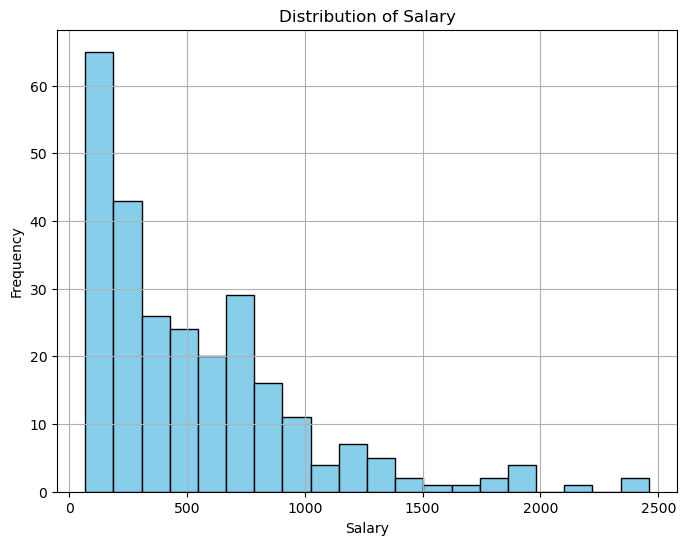

In [186]:
import matplotlib.pyplot as plt

# Plotting the distribution of y
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


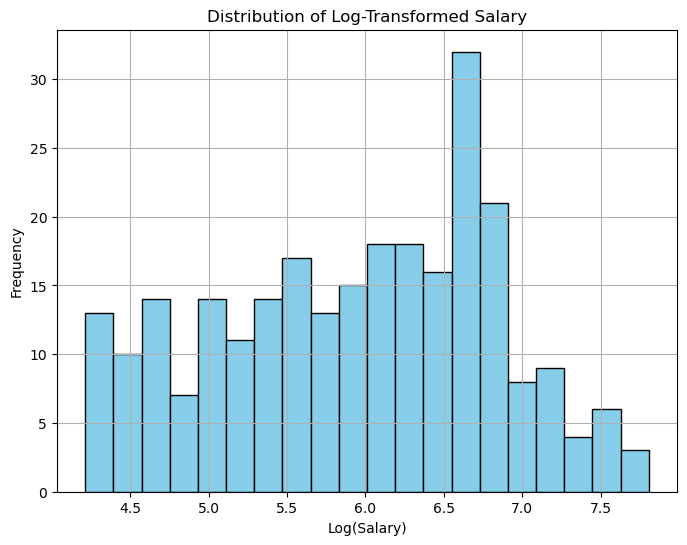

In [187]:
import numpy as np

# Filter out NaN values from y and perform the log transformation
y_valid = [value for value in y if not np.isnan(value)]
y_log = np.log(y_valid)

# Plotting the distribution of log-transformed Salary
plt.figure(figsize=(8, 6))
plt.hist(y_log, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-Transformed Salary')
plt.xlabel('Log(Salary)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [188]:
# Next, we need to split the data into into 50% training data, 25% validation data, and 25% test data.
trainsize = int(0.5 * len(X))
valsize = int(0.25 * len(X))

X_train = X[:trainsize]
X_val = X[trainsize:trainsize + valsize]
X_test = X[trainsize + valsize:]

y_train = y_log[:trainsize]
y_val = y_log[trainsize:trainsize + valsize]
y_test = y_log[trainsize + valsize:]

print(len(X_train), len(X_val), len(X_test))
print(len(y_train), len(y_val), len(y_test))


131 65 67
131 65 67


In [ ]:
# Model Development, Testing and Hyperparameter Optimization

In [189]:
# A. Single Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

# Instantiate the DecisionTreeRegressor with default settings
regressor = DecisionTreeRegressor()

# Fit the regressor to the training data
regressor.fit(X_train, y_train)



DecisionTreeRegressor()

In [190]:
# Score the Decision Tree Regression Model

from sklearn.metrics import mean_squared_error

# Score the model on the training data
train_score = regressor.score(X_train, y_train)
train_predictions = regressor.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Score the model on the validation data
val_score = regressor.score(X_val, y_val)
val_predictions = regressor.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)

# Score the model on the test data
test_score = regressor.score(X_test, y_test)
test_predictions = regressor.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training Score:", train_score)
print("Training MSE:", train_mse)
print("Validation Score:", val_score)
print("Validation MSE:", val_mse)
print("Test Score:", test_score)
print("Test MSE:", test_mse)





Training Score: 1.0
Training MSE: 0.0
Validation Score: 0.5587164537125167
Validation MSE: 0.3787097926814133
Test Score: 0.7070098247833088
Test MSE: 0.2855998381359662


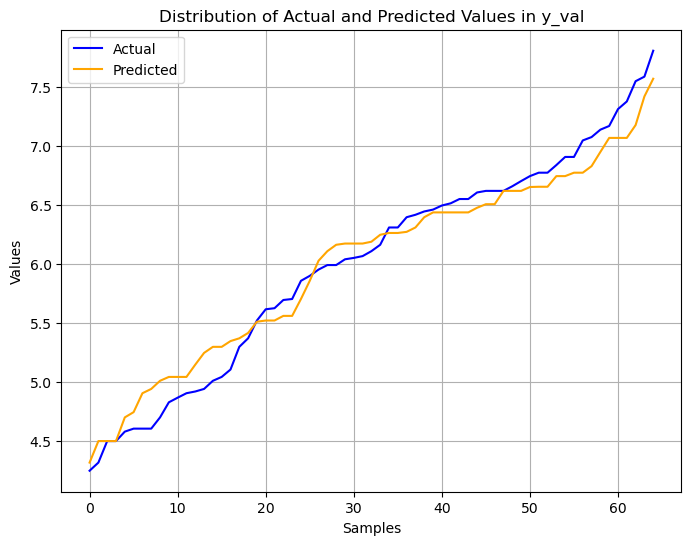

In [193]:
# Plot Predicted versus Actual Values

import matplotlib.pyplot as plt

# Generate predictions on the validation data
val_predictions = regressor.predict(X_val)

# Sort actual and predicted values for plotting
y_val_sorted = sorted(y_val)
val_predictions_sorted = sorted(val_predictions)

# Plot the distribution of actual and predicted values in y_val
plt.figure(figsize=(8, 6))
plt.plot(y_val_sorted, label='Actual', color='blue')
plt.plot(val_predictions_sorted, label='Predicted', color='orange')
plt.title('Distribution of Actual and Predicted Values in y_val')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()




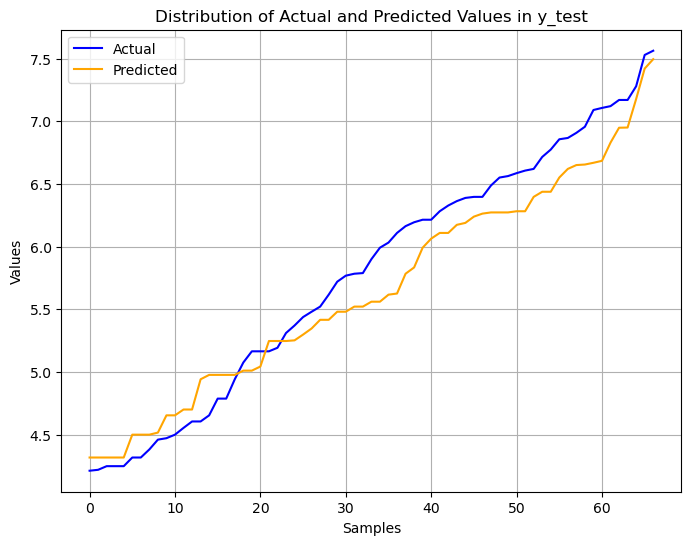

In [194]:
# # Plot Predicted versus Actual Values
import matplotlib.pyplot as plt

# Generate predictions on the test data
test_predictions = regressor.predict(X_test)

# Sort actual and predicted values for plotting
y_test_sorted = sorted(y_test)
test_predictions_sorted = sorted(test_predictions)

# Plot the distribution of actual and predicted values in y_test
plt.figure(figsize=(8, 6))
plt.plot(y_test_sorted, label='Actual', color='blue')
plt.plot(test_predictions_sorted, label='Predicted', color='orange')
plt.title('Distribution of Actual and Predicted Values in y_test')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [195]:
# Optimizing Hyperparameter of Decision Tree (Tree Depth)
bestdepth=-1
bestscore=0
max_depth = 15

In [204]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

best_depth = -1
best_score = 0
min_mse = float('inf')

# Iterate over different tree depths
for depth in range(1, max_depth + 1):
    # Train decision tree regressor with current depth
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    regressor.fit(X_train, y_train)
    
    # Generate predictions on the validation data
    val_predictions = regressor.predict(X_val)
    
    # Calculate mean squared error (MSE) on validation data
    mse = mean_squared_error(y_val, val_predictions)
    
    # Update best depth and best score if current MSE is lower
    if mse < min_mse:
        best_depth = depth
        best_score = regressor.score(X_val, y_val)
        min_mse = mse

    print(f"Depth {depth}: MSE = {mse}")

print(f"Best depth: {best_depth}")
print(f"Best score on validation data: {best_score}")


Depth 1: MSE = 0.44069589463984205
Depth 2: MSE = 0.4259261675693846
Depth 3: MSE = 0.3457787317105789
Depth 4: MSE = 0.37030165678935045
Depth 5: MSE = 0.43910202709082086
Depth 6: MSE = 0.4261640505552247
Depth 7: MSE = 0.37834128365797254
Depth 8: MSE = 0.4328382283248607
Depth 9: MSE = 0.3864998484114058
Depth 10: MSE = 0.3891024734307632
Depth 11: MSE = 0.3704849837134849
Depth 12: MSE = 0.44081624337355607
Depth 13: MSE = 0.40420925415507064
Depth 14: MSE = 0.40449280333537657
Depth 15: MSE = 0.40449280333537657
Best depth: 3
Best score on validation data: 0.5970886734149103


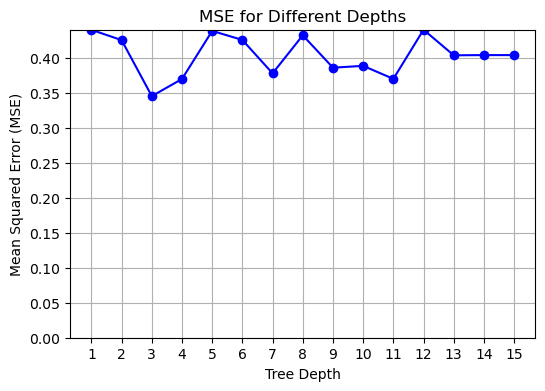

In [262]:
import matplotlib.pyplot as plt

# Lists to store depths and corresponding MSE values
depths = []
mse_values = []

# Iterate over different tree depths
for depth in range(1, max_depth + 1):
    # Train decision tree regressor with current depth
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    regressor.fit(X_train, y_train)
    
    # Generate predictions on the validation data
    val_predictions = regressor.predict(X_val)
    
    # Calculate mean squared error (MSE) on validation data
    mse = mean_squared_error(y_val, val_predictions)
    
    # Append depth and MSE to lists
    depths.append(depth)
    mse_values.append(mse)

# Plot MSE for different depths
plt.figure(figsize=(6, 4))
plt.plot(depths, mse_values, marker='o', color='b')
plt.title('MSE for Different Depths')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(depths)  # Set x-axis ticks to show all depths
plt.ylim(0, max(mse_values))  # Set y-axis limits from 0 to maximum MSE value
plt.grid(True)
plt.show()




In [206]:
import numpy as np

# Combine feature matrices
X_combined = np.concatenate((X_train, X_val), axis=0)

# Combine target vectors
y_combined = np.concatenate((y_train, y_val), axis=0)

print("Combined feature matrix shape:", X_combined.shape)
print("Combined target vector shape:", y_combined.shape)


Combined feature matrix shape: (196, 22)
Combined target vector shape: (196,)


In [209]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the DecisionTreeRegressor with the best depth
regressor_best_depth = DecisionTreeRegressor(max_depth=best_depth)

# Fit the regressor to the combined data
regressor_best_depth.fit(X_combined, y_combined)

# Predict on the test data
test_predictions_best_depth = regressor_best_depth.predict(X_test)

# Calculate MSE for the best depth
mse_best_depth = mean_squared_error(y_test, test_predictions_best_depth)

print(f"MSE at Best Depth ({best_depth}): {mse_best_depth}")
print("Actual Values (y_test):", y_test)
print("Predicted Values (test_predictions_best_depth):", test_predictions_best_depth)

MSE at Best Depth (3): 0.16979675593794663
Actual Values (y_test): [5.19295685 6.03228734 6.39692966 7.56297783 6.3630281  7.17011954
 7.12084849 6.10924758 7.52911641 4.55387689 5.31073989 6.58617165
 7.27931884 6.86693328 5.48063892 4.46014441 4.78749174 7.09007684
 6.85646198 4.24849524 7.17011954 6.71538339 4.31748811 5.99146455
 5.768321   4.24849524 5.52146092 5.07517382 4.38202663 6.60665019
 4.78749174 6.32793678 5.6167711  5.37063803 6.28226675 7.10660614
 6.1633148  6.2146081  5.78382518 5.72031178 5.7889413  4.24849524
 5.16478597 4.65396035 4.60517019 5.16478597 6.62007321 4.47163879
 6.95654544 4.21950771 6.77422389 5.89989735 6.48768402 4.31748811
 6.90775528 4.2121276  6.39692966 5.43807931 4.94164242 6.55108034
 6.2146081  4.49980967 6.19440539 6.56291432 6.38856141 5.16478597
 4.60517019]
Predicted Values (test_predictions_best_depth): [4.7243305  6.10163169 6.8121324  6.8121324  6.22905372 6.10163169
 6.8121324  6.10163169 6.8121324  4.7243305  5.49627371 6.8121324
 6

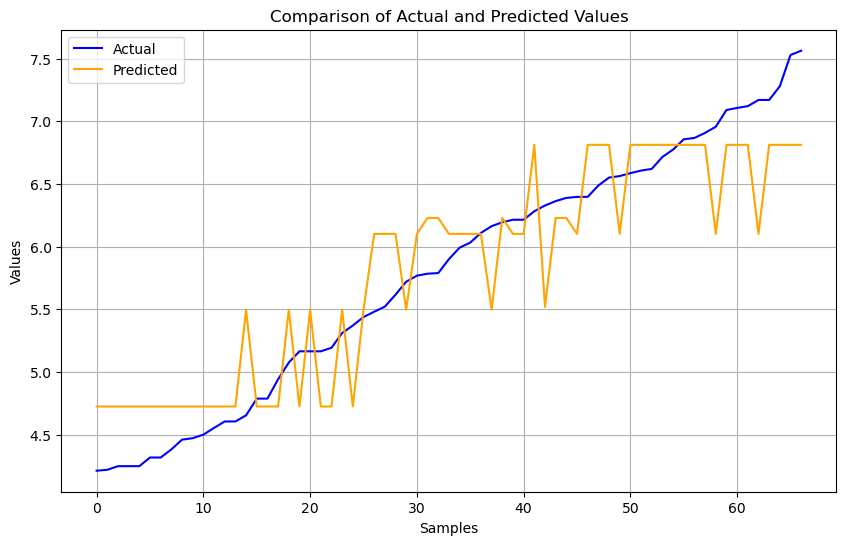

In [210]:
import matplotlib.pyplot as plt

# Sort the indices for plotting
sorted_indices = np.argsort(y_test)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test[sorted_indices], label='Actual', color='blue')
plt.plot(test_predictions_best_depth[sorted_indices], label='Predicted', color='orange')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


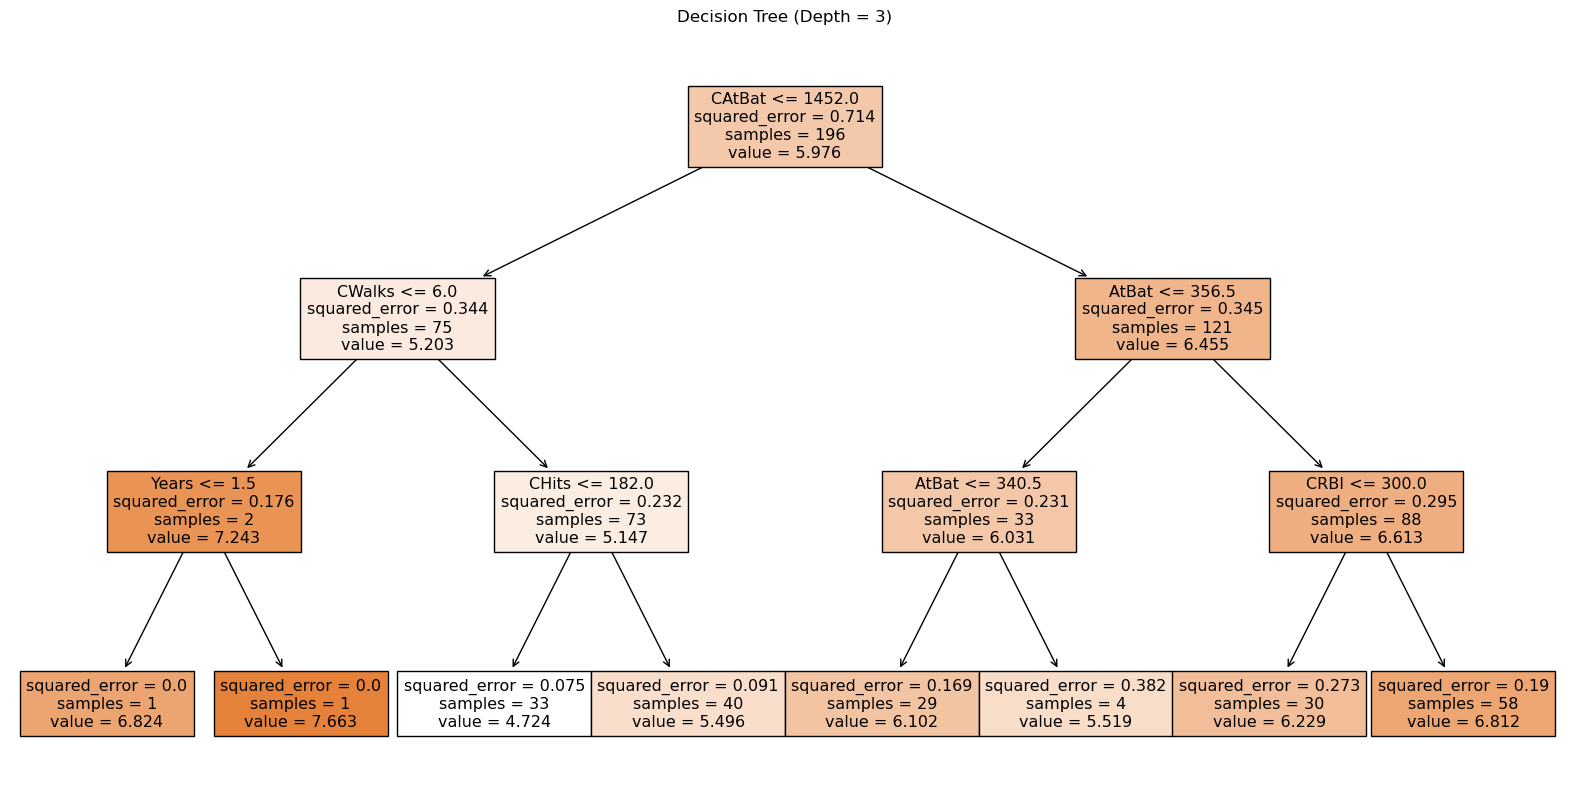

In [220]:
from sklearn.tree import plot_tree

# Convert feature names to a list
feature_names_list = list(Hitters.columns[:-1])

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor_best_depth, max_depth=best_depth, feature_names=feature_names_list, filled=True)
plt.title(f'Decision Tree (Depth = {best_depth})')
plt.show()



In [218]:
from sklearn.metrics import mean_squared_error

# Get leaf node ids for each sample
leaf_node_ids_test = regressor_best_depth.apply(X_test)

# Initialize lists to store mean actual and predicted salaries
mean_actual_salaries = []
mean_predicted_salaries = []
mse_leaf_nodes = []

# Iterate over unique leaf node ids
for leaf_id in np.unique(leaf_node_ids_test):
    # Find samples in the current leaf node
    leaf_samples_indices = np.where(leaf_node_ids_test == leaf_id)[0]
    
    # Get actual salaries for samples in the leaf node
    actual_salaries_leaf = y_test[leaf_samples_indices]
    
    # Calculate mean actual salary
    mean_actual_salary = np.mean(actual_salaries_leaf)
    
    # Get predicted salaries for samples in the leaf node
    predicted_salaries_leaf = test_predictions_best_depth[leaf_samples_indices]
    
    # Calculate mean predicted salary
    mean_predicted_salary = np.mean(predicted_salaries_leaf)
    
    # Calculate MSE in the leaf node
    mse_leaf_node = mean_squared_error(actual_salaries_leaf, predicted_salaries_leaf)
    
    # Append results to lists
    mean_actual_salaries.append(mean_actual_salary)
    mean_predicted_salaries.append(mean_predicted_salary)
    mse_leaf_nodes.append(mse_leaf_node)

# Print mean actual salary, mean predicted salary, and MSE in each leaf node
for leaf_id, mean_actual_salary, mean_predicted_salary, mse_leaf_node in zip(np.unique(leaf_node_ids_test), mean_actual_salaries, mean_predicted_salaries, mse_leaf_nodes):
    print(f"Leaf Node {leaf_id}:")
    print(f"  Mean Actual Salary: {mean_actual_salary:.2f}")
    print(f"  Mean Predicted Salary: {mean_predicted_salary:.2f}")
    print(f"  MSE: {mse_leaf_node:.2f}")
    print()



Leaf Node 6:
  Mean Actual Salary: 4.61
  Mean Predicted Salary: 4.72
  MSE: 0.14

Leaf Node 7:
  Mean Actual Salary: 5.36
  Mean Predicted Salary: 5.50
  MSE: 0.22

Leaf Node 10:
  Mean Actual Salary: 6.14
  Mean Predicted Salary: 6.10
  MSE: 0.24

Leaf Node 11:
  Mean Actual Salary: 6.33
  Mean Predicted Salary: 5.52
  MSE: 0.65

Leaf Node 13:
  Mean Actual Salary: 6.10
  Mean Predicted Salary: 6.23
  MSE: 0.09

Leaf Node 14:
  Mean Actual Salary: 6.87
  Mean Predicted Salary: 6.81
  MSE: 0.13



In [223]:
from sklearn.metrics import mean_squared_error

# Get leaf node ids for each sample
leaf_node_ids_test = regressor_best_depth.apply(X_test)

# Initialize lists to store mean actual and predicted salaries
mean_actual_salaries = []
mean_predicted_salaries = []
mse_leaf_nodes = []

# Iterate over unique leaf node ids
for leaf_id in np.unique(leaf_node_ids_test):
    # Find samples in the current leaf node
    leaf_samples_indices = np.where(leaf_node_ids_test == leaf_id)[0]
    
    # Get actual salaries for samples in the leaf node
    actual_salaries_leaf = y_test[leaf_samples_indices]
    
    # Calculate mean actual salary
    mean_actual_salary = np.mean(actual_salaries_leaf)
    
    # Exponentiate mean actual salary
    exp_mean_actual_salary = np.exp(mean_actual_salary)
    
    # Get predicted salaries for samples in the leaf node
    predicted_salaries_leaf = test_predictions_best_depth[leaf_samples_indices]
    
    # Calculate mean predicted salary
    mean_predicted_salary = np.mean(predicted_salaries_leaf)
    
    # Exponentiate mean predicted salary
    exp_mean_predicted_salary = np.exp(mean_predicted_salary)
    
    # Calculate MSE in the leaf node
    mse_leaf_node = mean_squared_error(actual_salaries_leaf, predicted_salaries_leaf)
    
    # Append results to lists
    mean_actual_salaries.append(mean_actual_salary)
    mean_predicted_salaries.append(mean_predicted_salary)
    mse_leaf_nodes.append(mse_leaf_node)

# Print mean actual salary, mean predicted salary, and MSE in each leaf node
for leaf_id, mean_actual_salary, exp_mean_actual_salary, mean_predicted_salary, exp_mean_predicted_salary, mse_leaf_node in zip(np.unique(leaf_node_ids_test), mean_actual_salaries, np.exp(mean_actual_salaries), mean_predicted_salaries, np.exp(mean_predicted_salaries), mse_leaf_nodes):
    print(f"Leaf Node {leaf_id}:")
    print(f"  Mean Actual Salary: {mean_actual_salary:.2f} (Exp: {exp_mean_actual_salary:.2f})")
    print(f"  Mean Predicted Salary: {mean_predicted_salary:.2f} (Exp: {exp_mean_predicted_salary:.2f})")
    print(f"  MSE: {mse_leaf_node:.2f}")
    print()


Leaf Node 6:
  Mean Actual Salary: 4.61 (Exp: 100.44)
  Mean Predicted Salary: 4.72 (Exp: 112.66)
  MSE: 0.14

Leaf Node 7:
  Mean Actual Salary: 5.36 (Exp: 212.92)
  Mean Predicted Salary: 5.50 (Exp: 243.78)
  MSE: 0.22

Leaf Node 10:
  Mean Actual Salary: 6.14 (Exp: 463.25)
  Mean Predicted Salary: 6.10 (Exp: 446.59)
  MSE: 0.24

Leaf Node 11:
  Mean Actual Salary: 6.33 (Exp: 560.00)
  Mean Predicted Salary: 5.52 (Exp: 249.42)
  MSE: 0.65

Leaf Node 13:
  Mean Actual Salary: 6.10 (Exp: 447.53)
  Mean Predicted Salary: 6.23 (Exp: 507.28)
  MSE: 0.09

Leaf Node 14:
  Mean Actual Salary: 6.87 (Exp: 961.97)
  Mean Predicted Salary: 6.81 (Exp: 908.81)
  MSE: 0.13



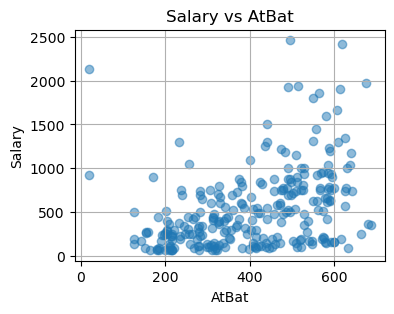

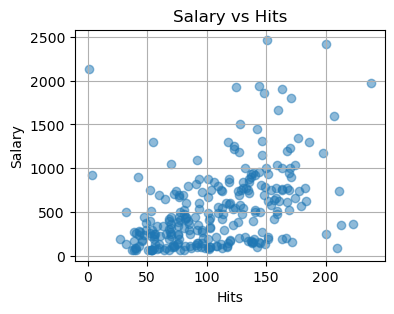

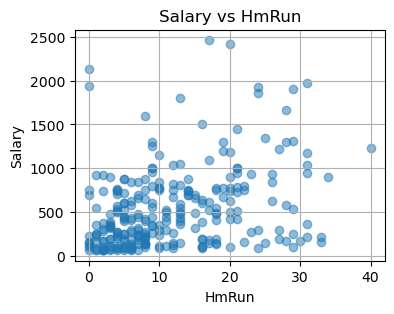

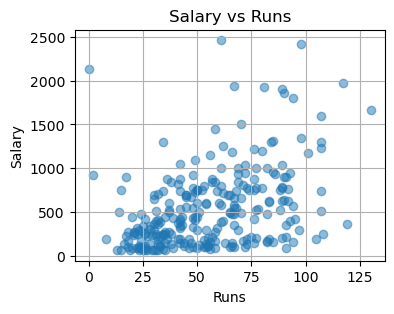

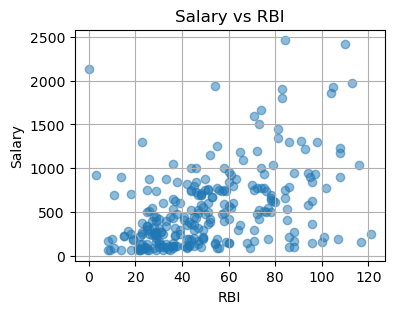

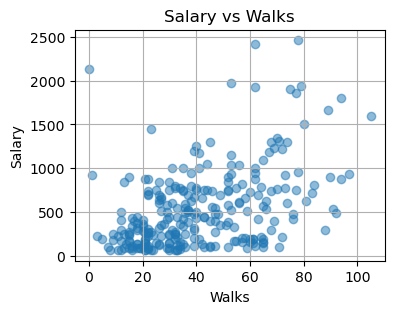

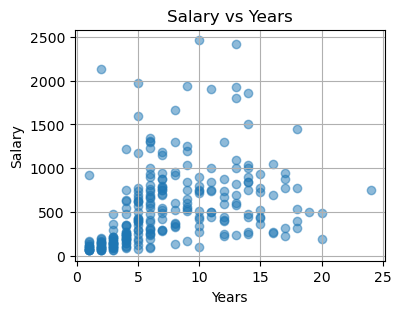

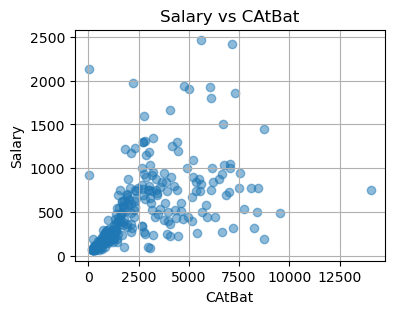

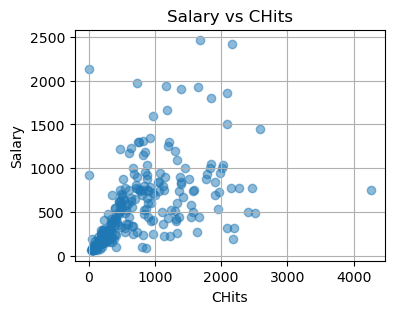

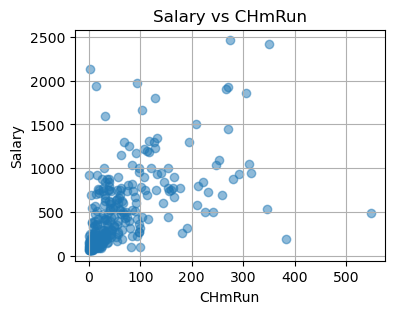

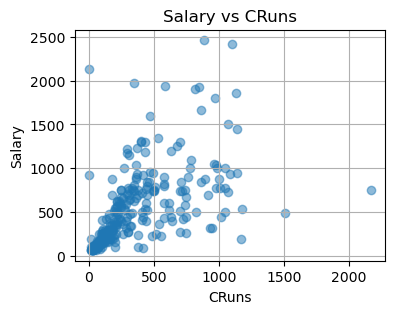

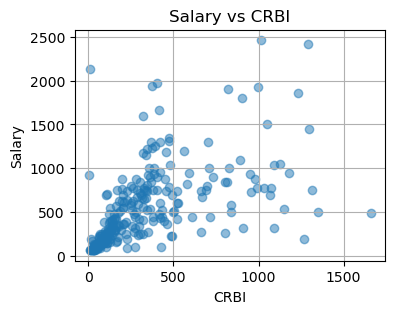

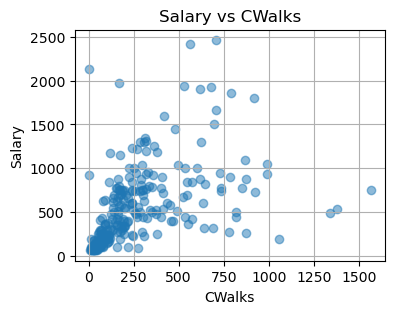

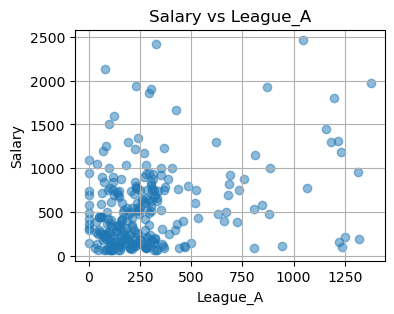

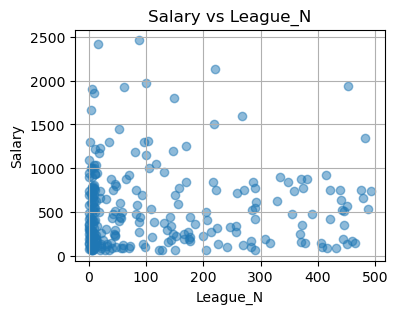

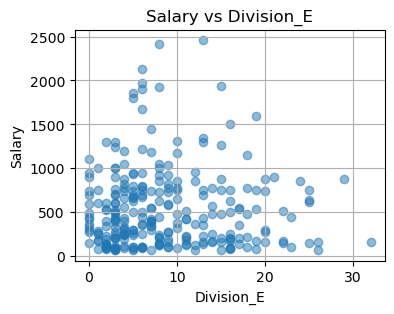

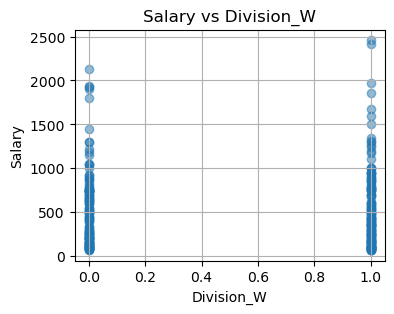

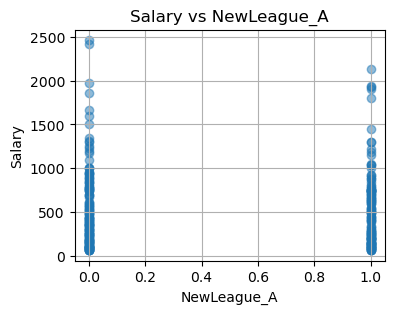

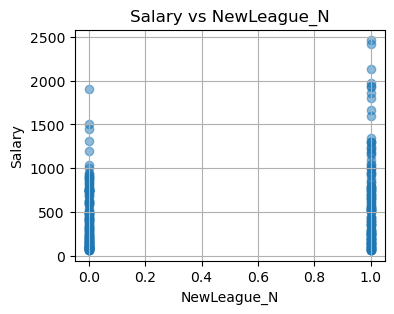

In [261]:
# Back to Data Exploration - Bivariate Plots of Salary versus Predictor Variables

import matplotlib.pyplot as plt

# Define column names
column_names = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun',
                'CRuns', 'CRBI', 'CWalks', 'League_A', 'League_N', 'Division_E', 'Division_W', 'NewLeague_A',
                'NewLeague_N']

# Iterate over each column in X and create a scatter plot against the target variable (Salary)
for i, column_name in enumerate(column_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f'Salary vs {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Salary')
    plt.grid(True)
    plt.show()



In [232]:
import pandas as pd

# Define column names
column_names = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun',
                'CRuns', 'CRBI', 'CWalks', 'League_A', 'League_N', 'Division_E', 'Division_W', 'NewLeague_A',
                'NewLeague_N']

# Create an empty list to store DataFrames
dfs = []

# Iterate over each column in X and create a DataFrame for scatter plot data
for i, column_name in enumerate(column_names):
    feature_values = X[:, i]
    df = pd.DataFrame({'Feature': feature_values, 'Salary': y, 'Feature Name': column_name})
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
scatter_data = pd.concat(dfs, ignore_index=True)

# Save the DataFrame to an Excel file
scatter_data.to_excel('bivariate_scatter_plots.xlsx', index=False)



In [233]:
# B. Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [234]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Score the model on the training data
train_r2 = rf_model.score(X_train, y_train)
train_predictions = rf_model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)  # RMSE

# Score the model on the validation data
val_r2 = rf_model.score(X_val, y_val)
val_predictions = rf_model.predict(X_val)
val_mae = mean_absolute_error(y_val, val_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = mean_squared_error(y_val, val_predictions, squared=False)  # RMSE

# Score the model on the test data
test_r2 = rf_model.score(X_test, y_test)
test_predictions = rf_model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)  # RMSE

print("Training R^2:", train_r2)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)

print("Validation R^2:", val_r2)
print("Validation MAE:", val_mae)
print("Validation MSE:", val_mse)
print("Validation RMSE:", val_rmse)

print("Test R^2:", test_r2)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)


Training R^2: 0.9636114225850122
Training MAE: 0.11174848395344524
Training MSE: 0.023374190720939915
Training RMSE: 0.15288620186576654
Validation R^2: 0.6595974698501812
Validation MAE: 0.349897204246723
Validation MSE: 0.2921336467353416
Validation RMSE: 0.5404938914875371
Test R^2: 0.8712581992377905
Test MAE: 0.26619436061311325
Test MSE: 0.12549443827536638
Test RMSE: 0.35425194180888603


In [235]:
# Calculate the mean of the actual salary for the test data
actual_salary_mean = y_test.mean()

# Calculate the mean of the predicted salary for the test data
predicted_salary_mean = test_predictions.mean()

print("Mean of actual salary for test data:", actual_salary_mean)
print("Mean of predicted salary for test data:", predicted_salary_mean)


Mean of actual salary for test data: 5.785362424995543
Mean of predicted salary for test data: 5.766031025009343


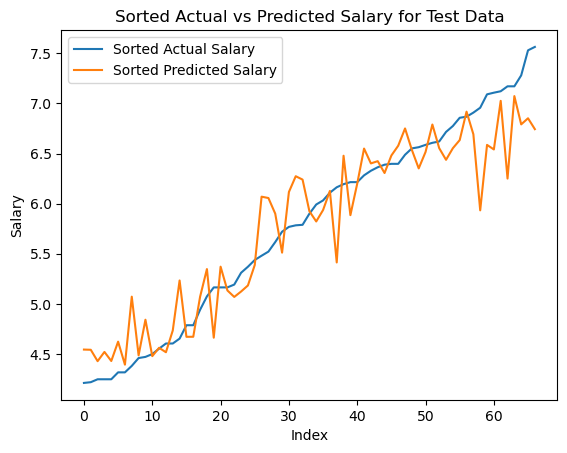

In [237]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the indices of the test data based on actual salaries for plotting purposes
sorted_indices = np.argsort(y_test)

# Sort the actual salaries and predicted salaries based on the sorted indices
sorted_actual_salaries = y_test[sorted_indices]
sorted_predicted_salaries = test_predictions[sorted_indices]

# Plot the sorted actual salary
plt.plot(sorted_actual_salaries, label='Sorted Actual Salary')

# Plot the sorted predicted salary
plt.plot(sorted_predicted_salaries, label='Sorted Predicted Salary')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Sorted Actual vs Predicted Salary for Test Data')

# Add legend
plt.legend()

# Show plot
plt.show()


In [263]:
# Optimization of Random Forest Hyperparameter (Maximum Features - Sqrt or None)
# for loop looking at RF with different max_features 

np.random.seed(1)

# Define values of max_features to iterate over
max_features_options = ["sqrt", None]

# Use a for loop to create and evaluate Random Forest models with different max_features values
for max_features in max_features_options:
    # Create a Random Forest model with the specified max_features
    rf_model = RandomForestRegressor(max_features=max_features, random_state=1)
    
    # Train the model on the training data
    rf_model.fit(X_train, y_train)
    
    # Evaluate the model and print the results
    print(f"Random Forest with max_features={max_features} train/validation/test:", rf_model.score(X_train, y_train), rf_model.score(X_val, y_val), rf_model.score(X_test, y_test))

Random Forest with max_features=sqrt train/validation/test: 0.9574675571663216 0.6757113279373217 0.8692502532325795
Random Forest with max_features=None train/validation/test: 0.9611367188451325 0.6498791880619909 0.8701076657616824


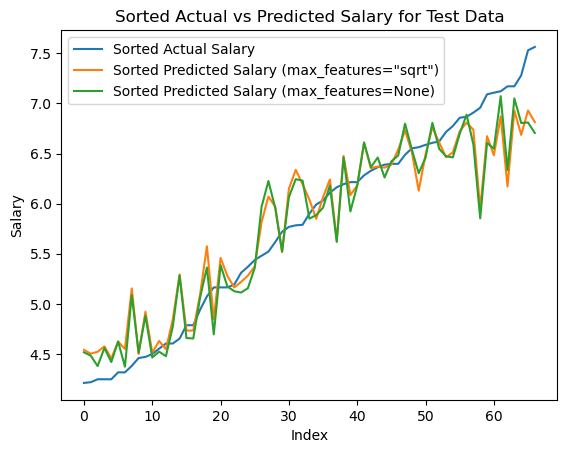

In [242]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the indices of the test data based on actual salaries for plotting purposes
sorted_indices = np.argsort(y_test)

# Sort the actual salaries
sorted_actual_salaries = y_test[sorted_indices]

# Sort the predicted salaries for each max_features value
sorted_predicted_salaries = {}
for max_features, predictions in predicted_salaries.items():
    sorted_predicted_salaries[max_features] = predictions[sorted_indices]

# Plot the sorted actual salary
plt.plot(sorted_actual_salaries, label='Sorted Actual Salary')

# Plot the sorted predicted salary for max_features="sqrt"
plt.plot(sorted_predicted_salaries["sqrt"], label='Sorted Predicted Salary (max_features="sqrt")')

# Plot the sorted predicted salary for max_features=None
plt.plot(sorted_predicted_salaries[None], label='Sorted Predicted Salary (max_features=None)')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Sorted Actual vs Predicted Salary for Test Data')

# Add legend
plt.legend()

# Show plot
plt.show()



In [243]:
# C. Boosting Regression
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoostRegressor model
ada_boost_model = AdaBoostRegressor(random_state=1)

# Fit the model to the training data
ada_boost_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [244]:
from sklearn.metrics import mean_squared_error

# Score the AdaBoost model on training data
train_score = ada_boost_model.score(X_train, y_train)
# Predict salaries for training data
train_predictions = ada_boost_model.predict(X_train)
# Calculate MSE for training data
train_mse = mean_squared_error(y_train, train_predictions)

# Score the AdaBoost model on validation data
val_score = ada_boost_model.score(X_val, y_val)
# Predict salaries for validation data
val_predictions = ada_boost_model.predict(X_val)
# Calculate MSE for validation data
val_mse = mean_squared_error(y_val, val_predictions)

# Score the AdaBoost model on test data
test_score = ada_boost_model.score(X_test, y_test)
# Predict salaries for test data
test_predictions = ada_boost_model.predict(X_test)
# Calculate MSE for test data
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate mean of actual salary for test data
mean_actual_salary = np.mean(y_test)
# Calculate mean of predicted salary for test data
mean_predicted_salary = np.mean(test_predictions)

# Print scores and errors
print("Training R^2 Score:", train_score)
print("Training MSE:", train_mse)
print("Validation R^2 Score:", val_score)
print("Validation MSE:", val_mse)
print("Test R^2 Score:", test_score)
print("Test MSE:", test_mse)
print("Mean of Actual Salary (Test Data):", mean_actual_salary)
print("Mean of Predicted Salary (Test Data):", mean_predicted_salary)


Training R^2 Score: 0.8958072329267436
Training MSE: 0.06692818962220982
Validation R^2 Score: 0.6535811392930463
Validation MSE: 0.29729686507231323
Test R^2 Score: 0.8429333193625086
Test MSE: 0.1531048559339731
Mean of Actual Salary (Test Data): 5.785362424995543
Mean of Predicted Salary (Test Data): 5.820451392531291


In [247]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Fit Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Score Random Forest model on validation and test data
rf_val_score = rf_model.score(X_val, y_val)
rf_test_score = rf_model.score(X_test, y_test)

# Fit AdaBoost regression model
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

# Score AdaBoost model on validation and test data
ada_val_score = ada_model.score(X_val, y_val)
ada_test_score = ada_model.score(X_test, y_test)

# Print scores
print("Random Forest Regression:")
print("Validation Score:", rf_val_score)
print("Test Score:", rf_test_score)

print("\nAdaBoost Regression:")
print("Validation Score:", ada_val_score)
print("Test Score:", ada_test_score)




Random Forest Regression:
Validation Score: 0.6498791880619909
Test Score: 0.8701076657616824

AdaBoost Regression:
Validation Score: 0.6563053797841236
Test Score: 0.8446002788546808


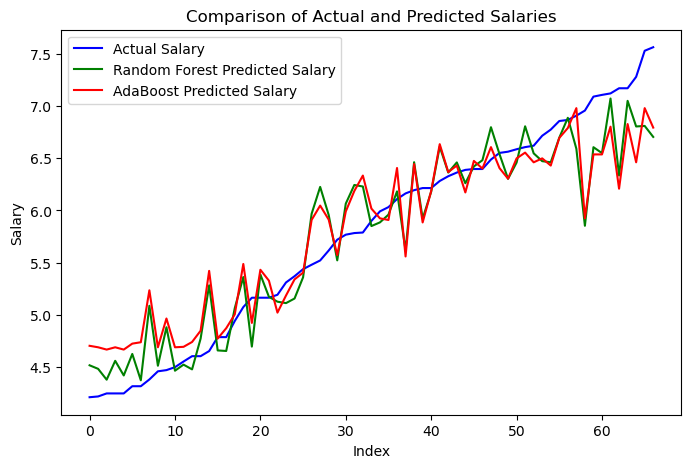

In [264]:
import matplotlib.pyplot as plt

# Predict salaries for Random Forest and AdaBoost models
rf_predictions = rf_model.predict(X_test)
ada_predictions = ada_model.predict(X_test)

# Sort the actual salaries and predictions based on the actual salary values
sorted_indices = y_test.argsort()
sorted_actual_salaries = y_test[sorted_indices]
sorted_rf_predictions = rf_predictions[sorted_indices]
sorted_ada_predictions = ada_predictions[sorted_indices]

# Plotting
plt.figure(figsize=(8, 5))

# Plot actual salaries
plt.plot(sorted_actual_salaries, label='Actual Salary', color='blue')

# Plot predicted salaries from Random Forest model
plt.plot(sorted_rf_predictions, label='Random Forest Predicted Salary', color='green')

# Plot predicted salaries from AdaBoost model
plt.plot(sorted_ada_predictions, label='AdaBoost Predicted Salary', color='red')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Comparison of Actual and Predicted Salaries')
plt.legend()

# Show plot
plt.show()


In [249]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit Random Forest Regression Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Score Random Forest on validation and test data
rf_val_score = rf_model.score(X_val, y_val)
rf_test_score = rf_model.score(X_test, y_test)

# Fit AdaBoost Regression Model
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train, y_train)

# Score AdaBoost on validation and test data
ada_val_score = ada_model.score(X_val, y_val)
ada_test_score = ada_model.score(X_test, y_test)

# D. Linear Regression
# Fit Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Score Linear Regression on training, validation, and test data
linear_train_score = linear_model.score(X_train, y_train)
linear_val_score = linear_model.score(X_val, y_val)
linear_test_score = linear_model.score(X_test, y_test)

# Print scores
print("Random Forest Regression:")
print(f"Validation Score: {rf_val_score:.3f}")
print(f"Test Score: {rf_test_score:.3f}")
print("\nAdaBoost Regression:")
print(f"Validation Score: {ada_val_score:.3f}")
print(f"Test Score: {ada_test_score:.3f}")
print("\nLinear Regression:")
print(f"Training Score: {linear_train_score:.3f}")
print(f"Validation Score: {linear_val_score:.3f}")
print(f"Test Score: {linear_test_score:.3f}")


Random Forest Regression:
Validation Score: 0.660
Test Score: 0.871

AdaBoost Regression:
Validation Score: 0.645
Test Score: 0.845

Linear Regression:
Training Score: 0.464
Validation Score: 0.442
Test Score: 0.607


In [250]:
# E and F. Ridge Regression and Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Fit Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Score Random Forest model on validation and test data
rf_val_score = rf_model.score(X_val, y_val)
rf_test_score = rf_model.score(X_test, y_test)

# Fit AdaBoost Regression model
ada_boost_model = AdaBoostRegressor(random_state=42)
ada_boost_model.fit(X_train, y_train)

# Score AdaBoost model on validation and test data
ada_boost_val_score = ada_boost_model.score(X_val, y_val)
ada_boost_test_score = ada_boost_model.score(X_test, y_test)

# Fit Lasso Regression model
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)

# Score Lasso model on training, validation, and test data
lasso_train_score = lasso_model.score(X_train, y_train)
lasso_val_score = lasso_model.score(X_val, y_val)
lasso_test_score = lasso_model.score(X_test, y_test)

# Fit Ridge Regression model
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)

# Score Ridge model on training, validation, and test data
ridge_train_score = ridge_model.score(X_train, y_train)
ridge_val_score = ridge_model.score(X_val, y_val)
ridge_test_score = ridge_model.score(X_test, y_test)

# Print scores
print("Random Forest Regression:")
print("Validation Score:", rf_val_score)
print("Test Score:", rf_test_score)

print("\nAdaBoost Regression:")
print("Validation Score:", ada_boost_val_score)
print("Test Score:", ada_boost_test_score)

print("\nLasso Regression:")
print("Training Score:", lasso_train_score)
print("Validation Score:", lasso_val_score)
print("Test Score:", lasso_test_score)

print("\nRidge Regression:")
print("Training Score:", ridge_train_score)
print("Validation Score:", ridge_val_score)
print("Test Score:", ridge_test_score)


Random Forest Regression:
Validation Score: 0.6595974698501812
Test Score: 0.8712581992377905

AdaBoost Regression:
Validation Score: 0.6450184594199913
Test Score: 0.8445658526697923

Lasso Regression:
Training Score: 0.39542608940321855
Validation Score: 0.4463604614947928
Test Score: 0.5539347145646234

Ridge Regression:
Training Score: 0.4644679866586633
Validation Score: 0.4417290978326277
Test Score: 0.606398624139123


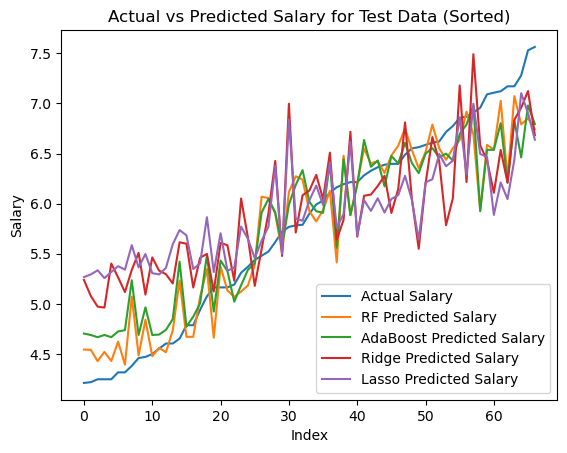

In [252]:
import numpy as np
import matplotlib.pyplot as plt

# Sort actual salary and predicted salaries based on actual salary
sorted_indices = np.argsort(y_test)
sorted_actual_salary = y_test[sorted_indices]
sorted_rf_predictions = rf_predictions[sorted_indices]
sorted_ada_boost_predictions = ada_boost_predictions[sorted_indices]
sorted_ridge_predictions = ridge_predictions[sorted_indices]
sorted_lasso_predictions = lasso_predictions[sorted_indices]

# Plot the sorted actual salary
plt.plot(sorted_actual_salary, label='Actual Salary')

# Plot the sorted predicted salaries from Random Forest with max_features="sqrt"
plt.plot(sorted_rf_predictions, label='RF Predicted Salary')

# Plot the sorted predicted salaries from AdaBoost
plt.plot(sorted_ada_boost_predictions, label='AdaBoost Predicted Salary')

# Plot the sorted predicted salaries from Ridge Regression
plt.plot(sorted_ridge_predictions, label='Ridge Predicted Salary')

# Plot the sorted predicted salaries from Lasso Regression
plt.plot(sorted_lasso_predictions, label='Lasso Predicted Salary')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary for Test Data (Sorted)')

# Add legend
plt.legend()

# Show plot
plt.show()


In [256]:
# Optimizing Ridge Regression and Lasso Hyperparameter (Tuning Parameter)
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Define a range of values for the tuning parameter (alpha)
alpha_values = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Initialize lists to store the scores and MSE
lasso_train_scores = []
lasso_val_scores = []
lasso_test_scores = []
lasso_train_mse = []
lasso_val_mse = []
lasso_test_mse = []

ridge_train_scores = []
ridge_val_scores = []
ridge_test_scores = []
ridge_train_mse = []
ridge_val_mse = []
ridge_test_mse = []

# Fit models and score for each alpha value
for alpha in alpha_values:
    # Fit Lasso regression model
    lasso_model = Lasso(alpha=alpha, random_state=42)
    lasso_model.fit(X_train, y_train)
    
    # Score Lasso model
    lasso_train_score = lasso_model.score(X_train, y_train)
    lasso_val_score = lasso_model.score(X_val, y_val)
    lasso_test_score = lasso_model.score(X_test, y_test)
    
    # Calculate MSE for Lasso model
    lasso_train_mse_value = mean_squared_error(y_train, lasso_model.predict(X_train))
    lasso_val_mse_value = mean_squared_error(y_val, lasso_model.predict(X_val))
    lasso_test_mse_value = mean_squared_error(y_test, lasso_model.predict(X_test))
    
    # Store scores and MSE
    lasso_train_scores.append(lasso_train_score)
    lasso_val_scores.append(lasso_val_score)
    lasso_test_scores.append(lasso_test_score)
    lasso_train_mse.append(lasso_train_mse_value)
    lasso_val_mse.append(lasso_val_mse_value)
    lasso_test_mse.append(lasso_test_mse_value)
    
    # Fit Ridge regression model
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train, y_train)
    
    # Score Ridge model
    ridge_train_score = ridge_model.score(X_train, y_train)
    ridge_val_score = ridge_model.score(X_val, y_val)
    ridge_test_score = ridge_model.score(X_test, y_test)
    
    # Calculate MSE for Ridge model
    ridge_train_mse_value = mean_squared_error(y_train, ridge_model.predict(X_train))
    ridge_val_mse_value = mean_squared_error(y_val, ridge_model.predict(X_val))
    ridge_test_mse_value = mean_squared_error(y_test, ridge_model.predict(X_test))
    
    # Store scores and MSE
    ridge_train_scores.append(ridge_train_score)
    ridge_val_scores.append(ridge_val_score)
    ridge_test_scores.append(ridge_test_score)
    ridge_train_mse.append(ridge_train_mse_value)
    ridge_val_mse.append(ridge_val_mse_value)
    ridge_test_mse.append(ridge_test_mse_value)

# Print scores and MSE
print("Lasso Regression Scores and MSE:")
print("Alpha\tTrain Score\tTrain MSE\tValidation Score\tValidation MSE\tTest Score\tTest MSE")
for i, alpha in enumerate(alpha_values):
    print(f"{alpha}\t{lasso_train_scores[i]}\t{lasso_train_mse[i]}\t{lasso_val_scores[i]}\t{lasso_val_mse[i]}\t{lasso_test_scores[i]}\t{lasso_test_mse[i]}")

print("\nRidge Regression Scores and MSE:")
print("Alpha\tTrain Score\tTrain MSE\tValidation Score\tValidation MSE\tTest Score\tTest MSE")
for i, alpha in enumerate(alpha_values):
    print(f"{alpha}\t{ridge_train_scores[i]}\t{ridge_train_mse[i]}\t{ridge_val_scores[i]}\t{ridge_val_mse[i]}\t{ridge_test_scores[i]}\t{ridge_test_mse[i]}")



Lasso Regression Scores and MSE:
Alpha	Train Score	Train MSE	Validation Score	Validation MSE	Test Score	Test MSE
1e-05	0.4643521268698423	0.3440732349336975	0.44525172043203987	0.47608529190138044	0.6092605058613276	0.3808835439509192
0.001	0.46429317889453436	0.3441111001462269	0.4438157839711092	0.47731761339625095	0.6069171844778254	0.38316775777253903
0.01	0.462229059652538	0.3454369864616758	0.4372675167353366	0.4829373400961138	0.5929757877006734	0.3967574989985003
0.1	0.4507308029680154	0.3528228878569762	0.42752136175166433	0.4913014958965272	0.5584258868914713	0.43043591866367836
1	0.39542608940321855	0.38834785240527625	0.4463604614947928	0.4751337696850072	0.5539347145646234	0.4348138063817218
10	0.34345262881729977	0.42173298769946754	0.3913663545322026	0.5223297438420267	0.5030092822492529	0.4844547037787663
100	0.29819892067871634	0.45080169222170924	0.3119653751233641	0.5904717099397899	0.3959326309530008	0.5888304708355749
1000	0.02864097208038363	0.6239521517471647	0.0

/Users/yatindranath/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.254e+01, tolerance: 8.415e-03
  model = cd_fast.enet_coordinate_descent(
/Users/yatindranath/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.254e+01, tolerance: 8.415e-03
  model = cd_fast.enet_coordinate_descent(
/Users/yatindranath/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

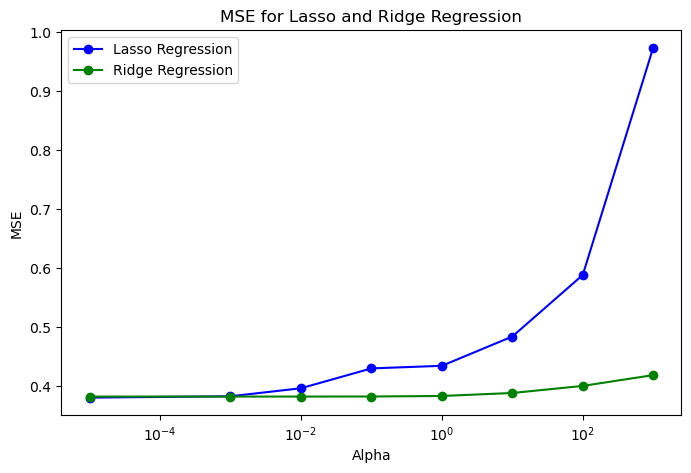

In [265]:
import matplotlib.pyplot as plt

# Plot MSE for both Lasso and Ridge regression on the same chart
plt.figure(figsize=(8, 5))

# Plot MSE for Lasso regression
plt.plot(alpha_values, lasso_test_mse, marker='o', label='Lasso Regression', color='blue')

# Plot MSE for Ridge regression
plt.plot(alpha_values, ridge_test_mse, marker='o', label='Ridge Regression', color='green')

plt.title('MSE for Lasso and Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.legend()
plt.show()

